# Дерево
## 1. Обработка данных
### 1.1 Чтение данных из датасета
***
Для начала импортируем все нужные для нас библиотеки. Пропишем путь до нашего датасета и считаем его с помощью `pandas`

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
PATH = "../data/bikes/"
train_file_name = "train.csv"
test_file_name = "test.csv"

In [13]:
train = pd.read_csv(f"{PATH}{train_file_name}")

С помощью `read_csv()` мы прочитали файл. Теперь посмотрим на наши данные.

In [14]:
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [15]:
train.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


In [16]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
datetime      10886 non-null object
season        10886 non-null int64
holiday       10886 non-null int64
workingday    10886 non-null int64
weather       10886 non-null int64
temp          10886 non-null float64
atemp         10886 non-null float64
humidity      10886 non-null int64
windspeed     10886 non-null float64
casual        10886 non-null int64
registered    10886 non-null int64
count         10886 non-null int64
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.6+ KB


Из первичного анализа данных видим, что у нас прекрасная ситуация: нуллов нету :)
Так же видим, что признаки **casual** и **registered** сильно коррелируют с нашим целевым признаком **count**. Они встали в очередь на удаление. У нас есть 4 *категориальных* признака **season**, **holiday**, **workingday** и **weather**.

Из метода `describe()` можно наблюдать медиану и среднее нашего целевого признака. А именно они сильно отличаются, на 40 велосипедов. Наблюдая максимум **count**, видим какое-то аномальное число 997 - это выброс.

Почитав описание с кагла к этому датасету, я не особо понял, что обозначает признак **workingday**. Возможно его лучше удалить. Далее проверим две модели с этим признаком и без него.
***
Теперь удаляем **casual** и **registered**

In [17]:
train.drop(['casual', 'registered'], axis=1, inplace = True)

### 1.2 Визуализация
***
Теперь построим пару графиков и попробуем увидеть в них какой-нибудь смысл.

Для начала посмотрим на погоду. Нас интересует количество дней с различной погодой. Как мы видим из графика ниже подавляющее количество дней было с хорошей погодой. Случай нормального снега вообще возможно единичный.

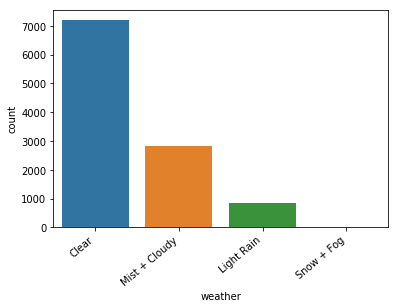

In [27]:
ax = sns.countplot(train['weather']);
ax.set_xticklabels(['Clear', 'Mist + Cloudy', 'Light Rain', 'Snow + Fog'], rotation=40, ha="right");

Теперь пожалуй посмотрим, как погода распределяется на временах года. Для этого построим сводную таблтцу с помощью `crosstab()`. 

Из таблицы видим, что случай с плохой погодой и вправду был единичным, и случился он весной. Построим график всего этого дела. По графику мы можем видеть, что распределение дней с различной погодой практически одинаковое. Это нам особо ничего не дает.

Теперь изобразим зависимость нашей целевого признака и времени года, дабы увидеть в каком времени года была самая большая аренда.

In [30]:
pd.crosstab(train['season'], train['weather'])

weather,1,2,3,4
season,,,,
1,1759,715,211,1
2,1801,708,224,0
3,1930,604,199,0
4,1702,807,225,0


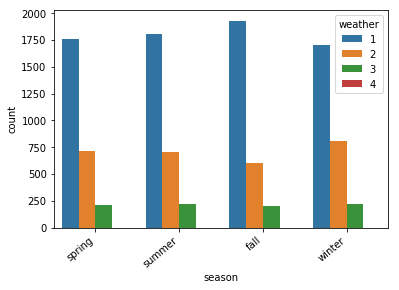

In [34]:
ax = sns.countplot(x = 'season', hue = 'weather', data = train);
ax.set_xticklabels(['spring', 'summer', 'fall', 'winter'], rotation=40, ha="right");

Из графика видим, что самая большая медиана у осени. Хорошо заметно, что весной количество клиентов заметно падает. С чем это связано пока не ясно. В остальные времена года количество взятых в аренду велосипедов по медиане примерно одинаковое.

Теперь построим такой же график, только теперь вместо *времен года* возьмем *погоду*.
Видим, что количество клиентов растет в ясную и облачную погоду. Когда идут дожди количество заказов падает больше чем в 2 раза.

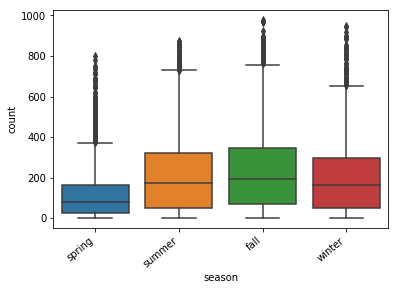

In [36]:
ax = sns.boxplot(x='season', y='count', data = train);
ax.set_xticklabels(['spring', 'summer', 'fall', 'winter'], rotation=40, ha="right");

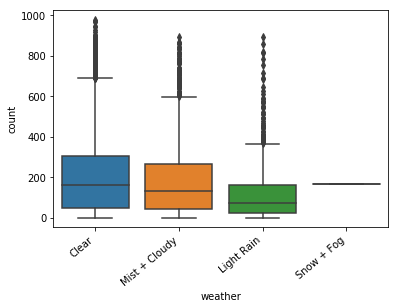

In [37]:
ax = sns.boxplot(x='weather', y='count', data = train);
ax.set_xticklabels(['Clear', 'Mist + Cloudy', 'Light Rain', 'Snow + Fog'], rotation=40, ha="right");

Так же теперь построим таблицу и график относительно признака **holiday**.

Как мы видим, медианы не сильно отличаются от друг друга. Можно наблюдать что в буднии дни клиентов немного больше, чем в выходные. Возможно люди на выходных становяться слишком ленивыми )

In [41]:
train.groupby('holiday')['count'].median()

holiday
0    145
1    133
Name: count, dtype: int64

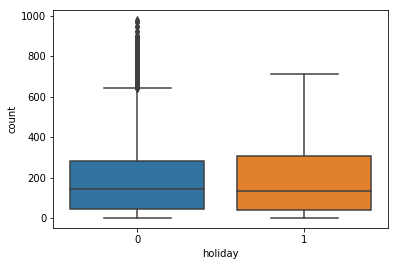

In [38]:
ax = sns.boxplot(x='holiday', y='count', data = train);

Так же строим график распределения погоды по временам года. Видим, что осенью самая высокая температура. Так же клиентов больше осенью. Значит скорее всего количество клиентов как-то зависит от температуры, в этом еще раз можно убедиться, если посмотреть на весну, когда клиентов меньше всего.

Попробуем построить график относительно **count** и **temp**. Получаем гистограммы и распределение температуры относительно заказов. Ничего не понимаем, переходим к следующему шагу.

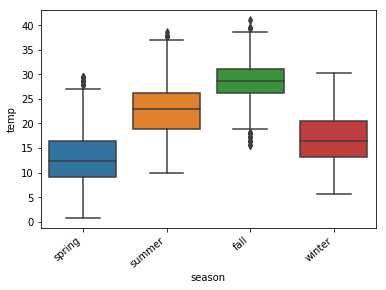

In [44]:
ax = sns.boxplot(x='season', y='temp', data = train);
ax.set_xticklabels(['spring', 'summer', 'fall', 'winter'], rotation=40, ha="right");

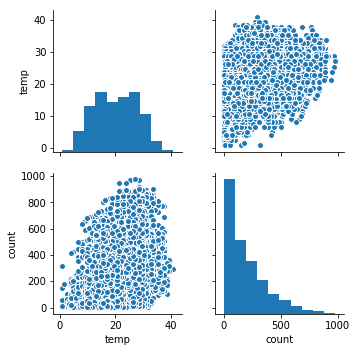

In [45]:
sns.pairplot(train[['temp', 'count']]);

Посмотрим на колонку **count** в `boxplot()`. Выбросы начинаются где-то с 620. Можно будет попробовать с что-то с ними сделатьв дальнейшем.

На этом можно заканчивать с визуализацией данных и переходить к построению нашего дерева.

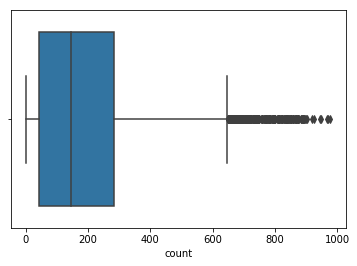

In [47]:
sns.boxplot(train['count']);

## 2. Построение модели
***
Для начала импортируем из `sciket-learn` нужный классификатор.

In [111]:
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.metrics import accuracy_score
import time
import datetime

Производим последние изменения над датасетом. Переводим *datetime* в *timestamp*, чтобы модель смогла скушать это. Далее отделяем нашу целевую фичу. Сплитим выборку, собираем дерево и обучаем его. Далее смотрим точность на валидационной выборке и ... идем тюнить гипер-параметры в надежде на лучшее.

In [65]:
train['datetime'] = train['datetime'].apply(lambda x: time.mktime(datetime.datetime.strptime(x, "%Y-%m-%d %H:%M:%S").timetuple()));

In [66]:
y = train['count']
x = train.drop('count', axis = 1)

In [67]:
x_train, x_val, y_train, y_val = train_test_split(train.values, y, test_size=0.2, random_state=42)

In [78]:
tree = DecisionTreeClassifier(max_depth=5, random_state=42)

In [79]:
tree.fit(x_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=42,
            splitter='best')

In [80]:
tree_pred = tree.predict(x_val)
accuracy_score(y_val, tree_pred)

0.11616161616161616

### Гипер-параметры
***
Импортируем еще пару модулей. И начинаем с помощью `GridSearchCV` искать нужные параметры нашего деревца.

In [81]:
from sklearn.model_selection import GridSearchCV, cross_val_score

In [104]:
tree_params = {'max_depth': range(1,11),
'max_features': range(4,11)}

In [105]:
tree_grid = GridSearchCV(tree, tree_params,
cv=5, n_jobs=-1,
verbose=True)

In [106]:
tree_grid.fit(x_train, y_train)

Fitting 5 folds for each of 70 candidates, totalling 350 fits


C:\Users\Fridge\Anaconda3\envs\fastai\lib\site-packages\sklearn\model_selection\_split.py:605: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    4.5s
[Parallel(n_jobs=-1)]: Done 268 tasks      | elapsed:    6.8s
[Parallel(n_jobs=-1)]: Done 350 out of 350 | elapsed:    7.7s finished


GridSearchCV(cv=5, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=42,
            splitter='best'),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'max_depth': range(1, 11), 'max_features': range(4, 11)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=True)

In [107]:
tree_grid.best_params_

{'max_depth': 10, 'max_features': 9}

После всего тюна гипер-параметров можно заключить, что чуда не случилось.

In [109]:
accuracy_score(y_val, tree_grid.predict(x_val))

0.17998163452708907

In [113]:
export_graphviz(tree_grid.best_estimator_, out_file=f"{PATH}churn_tree.dot", feature_names=train.columns, filled=True)